## Tableau Consultant Domain

### Tableau 라이선스별 비교(Creator vs Explorer)
* 가장 큰 차이점은 Tableau 제품군(Desktop, Prep 등)을 이용할 수 있느냐에 차이점이 있음

### TSM 명령어
* Tableau Services Manager(TSM): Tableau Server의 설치, 구성, 관리, 모니터링 백업 등 서버 운영 전반을 담당하는 관리 도구
* 기본구조: tsm <service> <action> [옵션]

**주요 TSM 명령어 분류 및 예시**
| 구분             | 명령어 및 설명                                                                 |
|------------------|---------------------------------------------------------------------------------|
| 상태 확인        | `tsm status` : 서버 전체 또는 특정 서비스의 상태 확인                         |
| 구성 관리        | `tsm configuration get/set` : 구성 값 조회/설정                               |
|                  | `tsm pending-changes` : 대기 중인 변경 사항 적용/취소                          |
| 서비스 관리      | `tsm restart` : 전체 또는 특정 서비스 재시작                                   |
|                  | `tsm stop/start` : 서버 중지/시작                                               |
| 백업/복구        | `tsm maintenance backup` : 전체 서버 백업                                      |
|                  | `tsm maintenance restore` : 백업 복구                                           |
| 업그레이드/패치  | `tsm version` : 현재 버전 확인                                                  |
|                  | `tsm upgrade` : 업그레이드 실행                                                 |
| 사용자/라이선스  | `tsm licenses activate/deactivate` : 라이선스 관리                              |
|                  | `tsm users` : 사용자 관리                                                       |
| 로그/모니터링    | `tsm maintenance ziplogs` : 로그 압축 및 수집                                   |
|                  | `tsm topology` : 노드/프로세스 구성 확인                                       |
| 인증/보안        | `tsm security` : SSL, 인증서, SAML 등 보안 설정 관련 명령어                    |


### 데이터 소스 연결방식
* 참고자료: https://tableauwiki.com/relationships_vs_blending_vs_join/ <br>
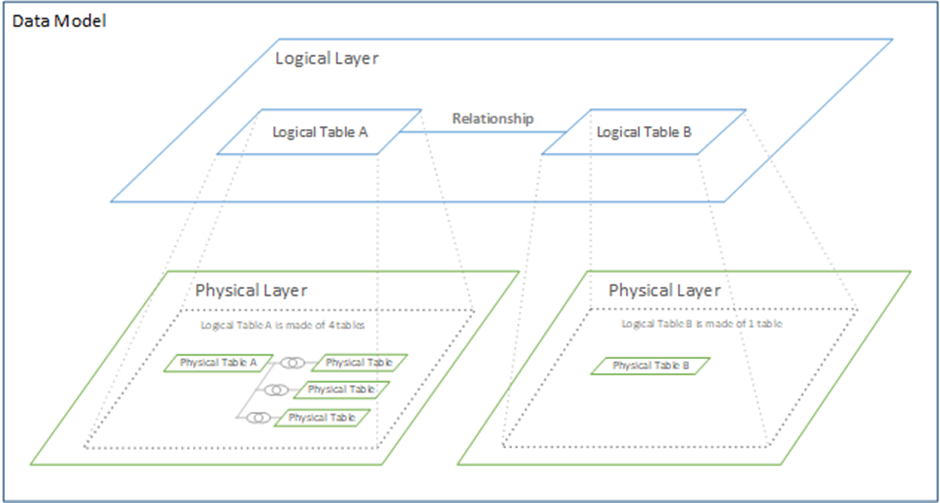

| 항목         | 관계 (Relationship)                                                                 | 조인 (Join)                                                                 |
|--------------|--------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| 계층         | 논리계층                                                                             | 물리계층                                                                     |
| 집계 수준    | - 관계에 따라 Tableau가 필요한 시점에 자동으로 집계 및 조인<br>- 집계 수준이 서로 다른 경우 측정값이 복제됨 | - 행 수준<br>- 집계 수준이 서로 다른 경우 측정값이 복제됨                    |
| 조인 유형    | 조인 자체는 존재하지 않으며, 관계에 따라 Tableau가 필요한 시점에 조인을 자동 적용    | 미리 정의한 형태로 고정                                                      |
| 테이블 형태  | 논리적 정의만 생성 (물리적 테이블 유지)                                             | 물리적 테이블 → 논리적 테이블                                               |
| 병합 시점    | 분석 시점 (동적) → 필요할 때만 병합                                                  | 데이터 소스 설정 시 (정적) → 즉시 병합                                      |
| 원본 유지    | O (테이블 고유성 보존)                                                               | X (하나의 테이블로 병합)                                                    |
| 중복/누락    | 적음                                                                                 | 조건에 따라 중복/누락 가능                                                  |
| 사용 예시    | 다양한 집계 수준이나 다대다 관계가 있는 경우, 유연한 분석이 필요한 경우              | 정해진 분석 구조가 있고, 간단히 하나의 테이블로 처리하려는 경우             |
| 특징         | - 테이블 간 관계를 논리적으로 정의<br>- Tableau가 자체적으로 데이터 결합 수행<br>- 게시된 데이터 소스 간에는 관계 정의 불가 | - 데이터 소스 내에서 명확한 조건(Inner, Left 등)으로 테이블을 직접 결합<br>- Tableau는 null 값이 포함된 다른 필드를 조인할 수 있는 추가 옵션 제공 |


### 블렌딩(Blending)
**정의**: 서로 다른 데이터 소스에서 데이터를 가져와 하나로 연결(결합)하는 방식

작동방식: 기본 데이터소스와 보조 데이터 소스를 지정하여 사용, 두 소스는 공통필드를 기준으로 비슷하게 병합되지만(Inner join과 유사), 실제로는 별도로 쿼리된 데이터를 시각화 계층에서 맞추는 방식임

**사용하는 경우**
- 시트별로 데이터 소스가 구성되는 방식을 변경해야 할 때
- 큐브 데이터 소스나 게시된 데이터 소스와 같이 관계나 조인을 허용하지 않는 데이터베이스를 결합하려는 경우

**주의사항**
- 보조소스의 집계 방식은 항상 집계된 상태로 반영
- 보조소스에서 LOD계산식 사용 불가
- 관계보다 유연성이 낮으며 중간 결과 확인이 어려움
- LEFT JOIN만 지원
- 게시된 데이터 소스를 결합하는 데 사용할 수 있지만 게시할 수는 없음
- 불연속 차원에 대해선 별칭 편집을 통해 블렌딩할 수 있음

**제한사항**
- COUNTD, MEDIAN, RAWSQLAGG와 같은 비가산적 집계에는 몇 가지 데이터 혼합 제한 사항이 있음(지원되지 않는 집계)
- 큐브 데이터 소스를 혼합하는 경우 해당 큐브 데이터 소스가 기본 데이터 소스여야 함(큐브 데이터 원본은 보조 데이터 원본으로는 사용할 수 없음)

**데이터 블렌딩 후 null 값이 나오는 경우**
- 2차 데이터 소스에는 1차 데이터 소스의 해당 값에 대한 값이 포함되어 있지 않음(매핑되는 값이 없음)
- 혼합하는 필드의 데이터 유형이 다름
- 1차 및 2차 데이터 소스의 값은 대소문자가 다름


**관계 vs 블렌딩**
| 항목              | 관계 (Relationship)                         | 블렌딩 (Blending)                          |
|-------------------|----------------------------------------------|---------------------------------------------|
| 생성 시점         | 데이터 원본 구성 단계                        | 워크시트 단계                                |
| (서버/온라인) 공유 | 가능                                         | 불가능                                       |
| LOD 계산          | 가능                                         | 데이터 원본 간의 LOD 계산 불가능             |
| 조인 유형         | 모든 유형의 조인 지원                        | LEFT JOIN                                   |
| 관계된 필드       | 데이터 원본 구성 단계에서 정의               | 워크시트마다 정의 가능                       |


### 추출 및 새로고침
**추출(Extract)**: 원본 데이터를 .hyper 파일로 변환하여 저장, 서버 부하와 비용 절감 효과가 큼

**새로고침 방식**
- 전체 새로고침: 전체 데이터를 다시 추출하여 최신 상태로 유지
- 증분 새로고침: 변경된 데이터(신규/수정분)만 추가로 추출, 성능 및 리소스 효율적임(마지막 새로 고침 이후의 새 행만 추가/새로 고침 날짜로부터 새로 고칠 기간 정의)

**특징**
- 추출이 증분 새로 고침으로 구성되지 않은 경우 추출 새로 고침을 선택하면 추출의 전체 새로 고침이 수행됨
- Tableau는 레코드가 입력된 날짜/시간을 반영하는 날짜/시간 필드를 기반으로 추출하는 것이 좋음
- 집계를 사용하도록 설정하면 증분 새로 고침을 사용할 수 없음



### 대시보드 성능 최적화
**데이터 타입별 속도**
- 정수, 불린(Boolean): 빠름
- 날짜, 문자열: 느림(복잡한 비교/계산 시 성능 저하)

**성능 향상**
- 불필요한 필터, 시트, 이미지 최소화
- 복잡한 계산은 데이터 준비 단계에서 처리
- 추출 및 컨텍스트 필터 적극 활용(추출 필터 설정으로 데이터 용량 최소화 가능)
- 증분 필드는 날짜/고유 ID가 적합 (예: 주문일자, 생성일 등)
- Tableau Server에서는 추출 새로고침 예약 작업으로 자동화 가능
- 새로고침 실패 시 → 데이터 소스 권한, 네트워크, 인증서 문제 확인 필요
- COUNTD는 가장 느린 함수 유형 중 하나이므로 가능하면 사용하지 않는 것을 권장


### 세부 수준(LOD) 및 뷰의 세부 수준
**LOD(Level of Detail)표현식**: 뷰의 차원과 무관하게 사용자가 원하는 집계 기준을 명시적으로 지정할 수 있음
- FIXED, INCLUDE, EXCLUDE 등 다양한 방식 제공

**뷰의 세부 수준**: 뷰에 추가된 차원에 따라 데이터의 집계 단위가 결정
- LOD를 활용하면 세부 수준을 자유롭게 제어 가능


| LOD 표현식 | 설명                                 |
|------------|--------------------------------------|
| FIXED      | 특정 차원에서 집계값을 고정          |
| INCLUDE    | 추가 차원을 포함하여 집계            |
| EXCLUDE    | 특정 차원을 제외하고 집계            |

### 세부 수준 표현 및 집계
- 뷰의 세부 수준이 뷰의 마크 수를 결정
- 뷰에 세부 수준 식을 추가할 경우, Tableau가 두 가지 세부 수준, 즉 뷰의 세부 수준과 식의 세부 수준을 조정해야 함(차원이 많아질수록 수준이 높아짐)

**세부 수준 식이 뷰 세부 수준보다 더 낮은 수준인 경우(EXCLUDE)**
- 뷰: Segment, Category
- 식: Segment
- 이 경우, 식의 세부수준이 뷰의 세부수준보다 낮음. 결과적으로, 뷰의 세부 수준 식을 사용하면 특정 값이 복제되어 여러 번 나타나게 됨

**세부 수준 식이 뷰 세부 수준보다 더 높은 수준인 경우(INCLUDE)**
- 뷰: Segment
- 식: Segment, Category
- Tableau에 의해 집계(이 경우 평균)가 자동으로 할당

- INCLUDE 세부수준 식은 뷰와 동일한 세부 수준이나 뷰보다 높은 세부 수준을 가짐, 따라서 값이 복제되지 않음(결과가 집계된다)
- FIXED 세부수준 식은 뷰보다 높은 세부 수준, 뷰보다 낮은 세부 수준 또는 뷰와 동일한 세부 수준을 가짐
- EXCLUDE 세부 수준 식을 사용하면 항상 복제된 값이 뷰에 나타남(Tableau에서 해당 식이 실제로 집계되는 것이 아니라는 것을 나타내기 위해 기본적으로 ATTR 집계(SUM 또는 AVG아님)를 적용하며, 이러한 집계를 변경해도 뷰는 영향을 받지 않음)


### 필터의 우선순위
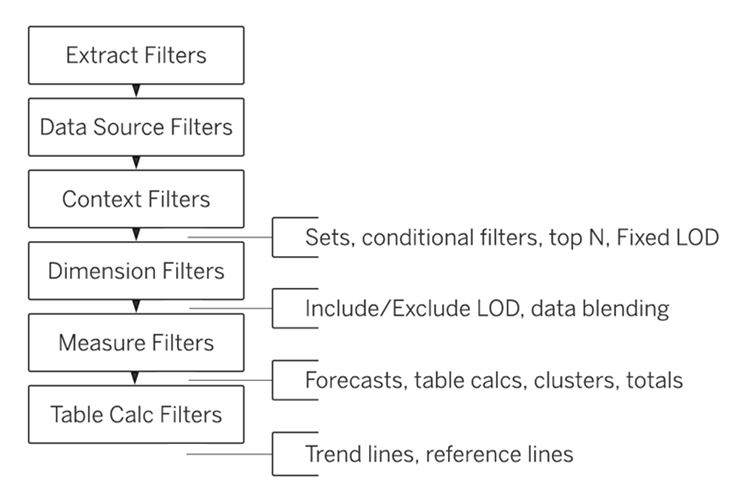

### 동작 기능
**동작 유형**

| 유형             | 설명                                                                 |
|------------------|----------------------------------------------------------------------|
| 필터             | 한 뷰의 데이터를 사용하여 다른 뷰의 데이터를 필터링                 |
| 하이라이트       | 다른 모든 마크를 흐리게 표시하여 해당 마크를 강조                   |
| URL로 이동       | 웹 페이지, 파일 등 외부 리소스로 연결되는 하이퍼링크를 만들 수 있음 |
| 매개 변수 변경   | 사용자가 비주얼리제이션의 마크와 직접 상호작용하여 매개 변수 값을 변경 |
| 집합 값 변경     | 사용자가 비주얼리제이션의 마크와 직접 상호작용하여 집합에 속하는 값을 변경할 수 있음 |


**동작 방식**

| 상황                                             | 동작 방식                                               |
|--------------------------------------------------|----------------------------------------------------------|
| 동일한 수준의 LOD 계산이 여러 개일 때           | 필드 이름을 알파벳 순으로 적용                           |
| 동일한 유형의 테이블 계산이 겹칠 때             | 계산 이름 기준으로 순서 결정                            |
| 동일한 컨텍스트 필터나 데이터 원본 필터가 여러 개일 때 | Tableau가 사전순으로 처리                                |


- 작업순서: 매개변수 -> 집합 -> 필터 -> 시트로 이동 -> 하이라이트 -> URL로 이동
- 각 유형 내에서 동작은 사전순으로 수행됨. 즉, 필터 동작이 두 개 있는 경우 필터 동작 ‘A Filter Action’이 ‘This is a Filter’보다 먼저 수행(동일 우선순위의 Tableau 동작은 필드 이름 기준으로 사전순(A → Z)으로 처리됨)


### 회계날짜(ISO-8601)
- 회계 날짜: 회계 연도/분기가 1월이 아닌 특정 월(예: 4월, 7월 등)부터 시작하는 경우, 사용자 정의 필드와 날짜 함수를 활용해 구현
- ISO-8601: 국제 표준 주차 계산(1월 4일이 포함된 주를 첫 주로 간주), DATEPART('iso-week', [Date]) 등 함수로 구현, 일반 양력은 그레고리안 달력(Standard Gregorian)

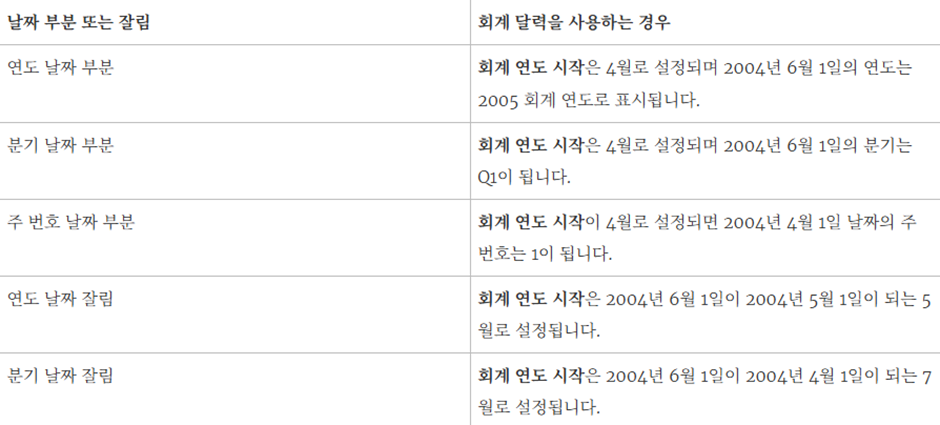

**ISO-8601 주 기반 달력(ISO-8601 주 단위 달력)**
| 항목     | 설명                                                                                       |
|----------|--------------------------------------------------------------------------------------------|
| 연도     | - ISO-8601 연도는 항상 1월 1일에 가장 가까운 월요일에 시작함<br>- ISO-8601 연도는 52주 또는 53주로 구성된 긴 연도 또는 짧은 연도일 수 있음 |
| 분기     | ISO-8601의 처음 3분기에는 항상 13주가 있음. 마지막 분기에는 13주 또는 14주가 있음           |
| 월       | - ISO-8601 주 기반 달력은 월 사용 X<br>- ISO-8601 분기를 4-4-5주의 세 부분으로 나눔        |
| 주번호   | ISO-8601 주 기반 달력의 모든 주는 정확히 7일이며 월요일에 시작                              |
| 일       | ISO-8601 주 단위 달력은 숫자 날짜 사용 X (예: 14일 또는 23일)                              |
| 요일     | - ISO-8601 요일은 항상 월요일에 시작, 한 자릿수로 표현<br>- 월요일은 1, 화요일은 2, 일요일은 7 |


**행 수준 보안(RLS, Row-Level Security)**
사용자의 권한에 따라 데이터의 특정 행만 조회할 수 있도록 제한하는 데이터 보안 방식
- 콘텐츠 및 기능에 대한 액세스를 제어하는 Tableau 사용 권한과 다름
- 사용 권한: 사용자가 통합 문서에 댓글을 달거나 통합문서를 편집할 수 있는지 여부를 제어
- 행 수준 보안: 동일한 대시보드를 보는 두 사용자가 각 사용자에게 보도록 허용된 데이터만 볼 수 있게 함
- 데이터 원본 또는 통합 문서 수준에서 RLS를 설정하거나 연결 수준에서 가상연결과 데이터 정책(Data Management 필요)를 사용하여 RLS를 설정할 수 있음

**RLS 워크플로우**
- 사용자는 Tableau Server 또는 Tableau Cloud에 로그인함으로써 식별
- 사용자의 데이터 자격 집합이 모든 가능한 데이터 자격에서 검색, 데이터는 해당 사용자의 자격을 사용하여 필터링
-> 계산필드에서 사용자 함수(ISMEMBEROF)를 사용해야 하는 경우가 많음

**자격 테이블**: 각 사용자 또는 그룹이 접근할 수 있는 데이터 범위를 정의한 별도의 테이블. 일반적으로 사용자 ID와 허용된 데이터 키(부서, 지점, 고객ID 등)를 매핑하여 관리
-	조인은 비용이 많이 드는 작업이기 때문에 성능 관점에서 비정규화 권장

**데이터 원본 필터**
- 두 접근 방식 모두에서 자격이 데이터와 올바르게 조인된 후 특정 사용자에 대한 데이터를 제한하는 필터 설정
[Username] = USERNAME()
ISMEMBEROF 함수 사용
- 이 계산을 데이터 원본 필터(TRUE를 선택한 상태)로 사용해야 함
- 데이터 원본이 내장되어 있고 사용자에게 통합 문서를 웹 편집하거나 다운로드하는 사용 권한이 있는 경우 RLS가 존재하지 않으며, 이는 이를 적용하는 필터를 쉽게 제거할 수 있기 때문
- Tableau 데이터 원본은 통합 문서에 내장된 상태로 두는 것이 아니라 별도로 게시
